Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer. Fundamental Idea Behind Ensemble Techniques

The fundamental idea of ensemble methods is that a group of weak or diverse models can combine to form a stronger overall model.

Instead of relying on a single predictor, ensemble techniques combine the predictions of multiple models to:

Reduce variance (make predictions more stable),

Reduce bias (capture more complex patterns),

Improve generalization on unseen data.

In essence:

“Many weak learners, when combined properly, can form a strong learner.”

Bagging (Bootstrap Aggregating)

Approach:

Multiple models (typically of the same type, like decision trees) are trained in parallel on different random subsets of the training data.

Each subset is obtained via bootstrap sampling (sampling with replacement).

Predictions from all models are averaged (for regression) or voted (for classification).

Objective:

To reduce variance and avoid overfitting by stabilizing the model’s predictions.

Example: Random Forest (an ensemble of decision trees using bagging).

Boosting

Approach:

Models are trained sequentially, where each new model focuses on correcting the errors made by the previous ones.

Misclassified or high-error samples are given higher weights, so subsequent models learn from these “hard” cases.

Final prediction is a weighted sum of all models.

Objective:

To reduce bias and improve accuracy by focusing learning on difficult examples.

Example: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process

Answer. A single decision tree tends to overfit the training data — it can grow very deep, perfectly classifying training samples but performing poorly on unseen data.

A Random Forest, on the other hand, is an ensemble of many decision trees that work together. It reduces overfitting through two key mechanisms:

1. Bootstrap Aggregation (Bagging)

Each tree is trained on a different random subset of the training data (sampled with replacement).

This introduces variation among trees and reduces their correlation.

When predictions are averaged (or majority-voted), random noise and overfitting tendencies cancel out, resulting in better generalization.

2. Random Feature Selection (Feature Subspacing)

At each split in each tree, the algorithm considers only a random subset of features instead of all features.

This ensures that not all trees rely on the same dominant predictors, promoting diversity among trees and reducing overfitting further.

Together, these techniques make Random Forests less sensitive to noise and more robust than a single deep decision tree.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer. What is Stacking (Stacked Generalization)?

Stacking is an ensemble learning technique that combines multiple different models (often of different types) to improve predictive performance.

The idea is to:

Train several base (level-0) models on the training data.

Use their predictions as input features to a meta-model (level-1 model).

The meta-model learns how to best combine the predictions of the base models to produce the final output.

In essence:

Stacking learns how to weight and blend the predictions of multiple diverse models, rather than just averaging or voting.

How Stacking Differs from Bagging and Boosting
Aspect	Bagging	Boosting	Stacking
Model Type	Usually the same base model (e.g., many decision trees).	Usually the same base model (e.g., shallow trees).	Can use different models (e.g., SVM, Random Forest, Logistic Regression).
Training Process	Models trained independently in parallel on random data subsets.	Models trained sequentially, each correcting previous errors.	Models trained in parallel first, then their predictions are combined by a meta-model.
Combination Method	Averaging (regression) or majority voting (classification).	Weighted sum based on model accuracy.	Meta-learner learns optimal combination of base model outputs.
Objective	Reduce variance.	Reduce bias.	Reduce both bias and variance by leveraging strengths of diverse models.
Simple Example Use Case

Problem: Predict whether a loan applicant will default.

Stacking setup:

Base Models (Level 0):

Random Forest (captures non-linear relationships)

Logistic Regression (captures linear patterns)

XGBoost (handles complex feature interactions)

Meta Model (Level 1):

Logistic Regression (learns how to combine the outputs of the above models)

Process:

Each base model is trained on the training set.

Their predictions on a validation set become inputs for the meta-model.

The meta-model learns which base models to trust more under which conditions.

Result:
The stacked model often performs better than any single model because it blends the strengths of each one.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer. What is the OOB (Out-of-Bag) Score?

In a Random Forest, each tree is trained on a bootstrap sample — a random sample (with replacement) of the training data.
Because of this sampling method, about 63–67% of the training samples are included in each tree’s bootstrap sample, while the remaining ~33% of the samples are not used for training that particular tree.

These unused samples are called Out-of-Bag (OOB) samples.

How the OOB Score is Computed

For each training instance, find all trees that did not include that instance in their bootstrap sample (i.e., trees for which the sample is OOB).

Use those trees to predict the label of that instance.

Compare the aggregated OOB predictions with the actual label.

Compute the overall accuracy (or other metric) across all training samples.

That final value is the OOB score — an internal, cross-validated performance estimate of the Random Forest.

Why the OOB Score is Useful

 1. Built-in validation (no need for a separate set):
Since each sample is “left out” from about one-third of the trees, the forest can use those predictions as a test set — meaning you can estimate model performance without explicitly splitting your data.

 2. Reduces data wastage:
All available data can be used for training, while still providing a reliable unbiased performance estimate.

 3. Quick feedback during training:
It provides a convenient way to monitor performance as the forest grows (e.g., in RandomForestClassifier(oob_score=True) in scikit-learn).

Example

Suppose you train a Random Forest with 100 trees on 10,000 samples:

Each tree is trained on ~6,300 samples (bootstrap sample).

~3,700 samples are OOB for that tree.

The OOB samples are predicted using the trees that didn’t see them.

The aggregated accuracy of these predictions might be:
OOB Score = 0.87 (≈ 87% accuracy).

This gives you an estimate of how the model might perform on unseen data — similar to validation accuracy.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer. | **Aspect**              | **AdaBoost**                                                                                                                    | **Gradient Boosting**                                                                                                                                                          |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Error Handling Idea** | Focuses on **misclassified samples** by adjusting their weights — future learners pay more attention to those difficult points. | Focuses on **residual errors (gradients)** — each new model is trained to predict the **residuals** (differences between actual and predicted values) from the previous model. |
| **Learning Mechanism**  | Sequentially trains models, each trying to correct the **classification mistakes** of the prior one.                            | Sequentially trains models to **minimize a loss function** (e.g., mean squared error, log loss) using **gradient descent** in function space.                                  |
| **Interpretation**      | Boosts weights of wrongly predicted samples.                                                                                    | Fits new learners to the gradient of the loss (i.e., the direction of greatest error reduction).                                                                               |

| **Aspect**            | **AdaBoost**                                                                                                                                                | **Gradient Boosting**                                                                                                                                             |
| --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Sample Weights**    | Each training sample has a weight. After each iteration, weights of **misclassified samples increase**, and those of correctly classified samples decrease. | Does **not use sample weights directly**. Instead, it computes **residuals (pseudo-residuals)** that represent the gradient of the loss function for each sample. |
| **Model Weight (α)**  | Each weak learner is assigned a weight (α) based on its accuracy: models with lower error get higher influence.                                             | Each weak learner contributes to the final model scaled by a **learning rate (shrinkage)** that controls how much each step affects the total prediction.         |
| **Optimization View** | Reweighting mechanism based on **classification error**.                                                                                                    | Gradient-based optimization of a **differentiable loss function**.                                                                                                |


| **Aspect**              | **AdaBoost**                                                                                                                                    | **Gradient Boosting**                                                                                                                                   |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **When to Use**         | When data is relatively clean and not too noisy (since AdaBoost is sensitive to outliers).                                                      | When you want flexible control over loss functions and regularization (handles complex problems and noise better).                                      |
| **Common Applications** | - Binary classification problems (e.g., spam detection, face detection).  <br> - Works well with **simple weak learners** like decision stumps. | - Regression and classification problems. <br> - Used in advanced variants like **XGBoost, LightGBM, CatBoost** for large-scale, high-dimensional data. |
| **Weak Learner Type**   | Typically **Decision Stumps** (one-level trees).                                                                                                | Typically **Deeper Decision Trees** (3–8 levels).                                                                                                       |
Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer. Most machine learning algorithms (like XGBoost, LightGBM, or Random Forests) cannot directly handle categorical features — they require manual preprocessing, such as:

One-hot encoding (which expands features and increases dimensionality), or

Label encoding (which may introduce artificial ordering).

CatBoost, however, was specifically designed to natively handle categorical variables, eliminating the need for such preprocessing.
It does this efficiently and avoids common pitfalls like target leakage and overfitting.

How CatBoost Handles Categorical Variables

CatBoost uses a technique called "Ordered Target Statistics" (also known as Ordered Encoding or Target-Based Encoding with Permutation).

Here’s how it works:

Target Statistics Encoding
Instead of one-hot encoding, CatBoost converts each categorical feature into numerical statistics derived from the target variable.
For example, for a categorical feature color in a classification problem, CatBoost computes:

Encoding
(
𝑐
𝑜
𝑙
𝑜
𝑟
)
=
Sum of target values for ’color’
Number of samples with ’color’
Encoding(color)=
Number of samples with ’color’
Sum of target values for ’color’
	​


This value represents how strongly that category is associated with the target.

Ordered (Permutation-Based) Encoding to Prevent Target Leakage
To avoid using future information when computing encodings (which would cause data leakage), CatBoost:

Randomly permutes the dataset.

For each sample, calculates its encoding only using data from previous samples in that permutation.

This simulates the real-world scenario where future data isn’t known during training.

This is known as ordered boosting and is a key innovation that helps CatBoost maintain unbiased estimates.

Combination of Categorical Features
CatBoost can automatically combine categorical features (e.g., color + brand) to capture higher-order interactions between them — something most algorithms would miss without manual feature engineering.

he Wine dataset (sklearn.datasets.load_wine()).


In [1]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
#Optimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).
#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using:
#a. Accuracy
#b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
#(Euclidean, Manhattan).
#6. Train the optimized KNN and compare results with the unscaled/scaled versions.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN with StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

# Best Parameters
print("\n=== Best Parameters from GridSearchCV ===")
print(grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (Scaled Data) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


=== KNN without Scaling ===
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN with StandardScaler ===
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Best Parameters from GridSearchCV ===
{'metric': 'euclidean', 'n_neighbors': np.int64(11)}
Best Cross-Validation A

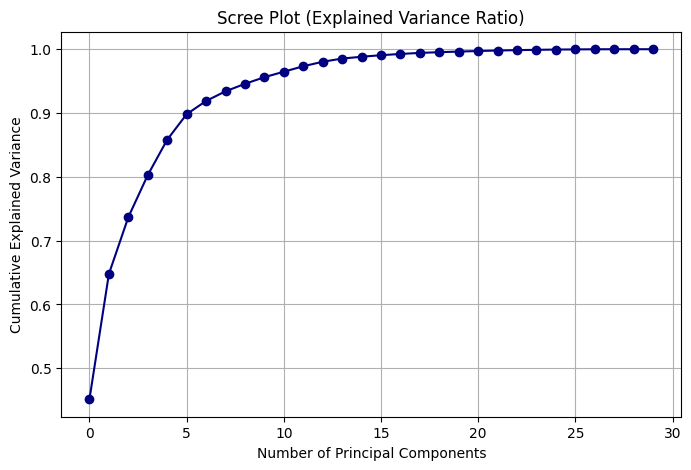

Number of components to retain 95% variance: 10

=== KNN on Original Data ===
Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


=== KNN on PCA-Transformed Data (95% Variance) ===
Accuracy: 0.9532163742690059
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


=== Comparison ===
Original Data Accuracy: 0.9591
PCA (95% Variance) Accuracy: 0.9532


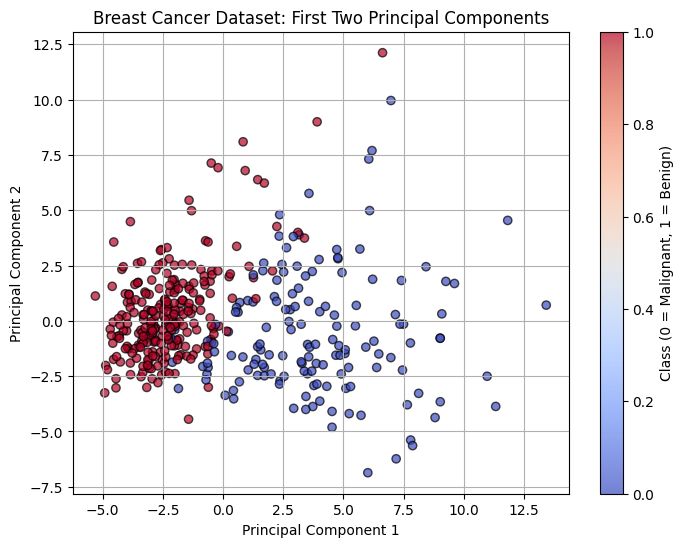

In [3]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare
#accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='navy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.grid(True)
plt.show()

pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_scaled, y_train)
y_pred_orig = knn_orig.predict(X_test_scaled)

acc_orig = accuracy_score(y_test, y_pred_orig)
print("\n=== KNN on Original Data ===")
print("Accuracy:", acc_orig)
print(classification_report(y_test, y_pred_orig))

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("\n=== KNN on PCA-Transformed Data (95% Variance) ===")
print("Accuracy:", acc_pca)
print(classification_report(y_test, y_pred_pca))

print("\n=== Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% Variance) Accuracy: {acc_pca:.4f}")

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=y_train,
    cmap='coolwarm',
    edgecolor='k',
    alpha=0.7
)
plt.title('Breast Cancer Dataset: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.grid(True)
plt.show()


=== KNN Regressor (K=5) ===
Euclidean Distance MSE: 4989.2901
Manhattan Distance MSE: 5558.4380


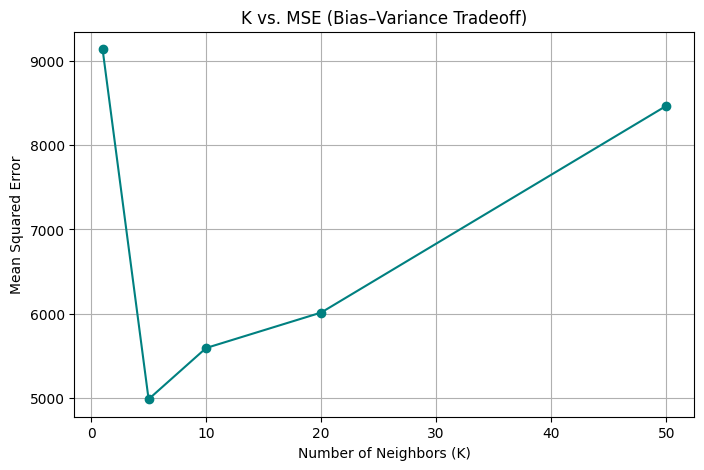

In [4]:
#Question 9:KNN Regressor with Distance Metrics and K-Value
#Analysis
#Task:
#1. Generate a synthetic regression dataset
#(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with:
#a. Euclidean distance (K=5)
#b. Manhattan distance (K=5)
#c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.Question 9:KNN Regressor with Distance Metrics and K-Value
#Analysis
#Task:
#1. Generate a synthetic regression dataset
#(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with:
#a. Euclidean distance (K=5)
#b. Manhattan distance (K=5)
#c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Generate Synthetic Regression Dataset
X, y = make_regression(
    n_samples=500, n_features=10, noise=15, random_state=42
)

# Step 3: Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Scale Features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN Regressor (K=5) with Euclidean Distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 6: Train KNN Regressor (K=5) with Manhattan Distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== KNN Regressor (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# Step 7: Analyze Effect of K (Bias–Variance Tradeoff)
K_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Step 8: Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(K_values, mse_scores, marker='o', color='teal')
plt.title("K vs. MSE (Bias–Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [5]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
#Data
#Task:
#1. Load the Pima Indians Diabetes dataset (contains missing values).
#2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
#3. Train KNN using:
#a. Brute-force method
#b. KD-Tree
#c. Ball Tree
#4. Compare their training time and accuracy.
#5. Plot the decision boundary for the best-performing method (use 2 most important
#features).
#Dataset: Pima Indians Diabetes

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Pima Indians Diabetes dataset
df = pd.read_csv('pima-indians-diabetes.csv')
# Example columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

# 2. Pre-process “missing values”: In this dataset zeros in certain columns are considered as missing.
cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_missing:
    df[col] = df[col].replace(0, np.nan)

# 3. Separate features/target and split into train/test (say 70% train, 30% test)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)  # you can tune n_neighbors if you want
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

# 5. Scale features (important for distance metrics in KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

# 6. Train KNN using different algorithm options and compare time + accuracy

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start

    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {'train_time': train_time, 'accuracy': acc}

# Print the results
for algo, res in results.items():
    print(f"Algorithm: {algo}, Training Time: {res['train_time']:.4f}s, Accuracy: {res['accuracy']:.4f}")


# 7. Choose the best-performing method (say algorithm_best) for decision boundary plot
algorithm_best = max(results, key=lambda x: results[x]['accuracy'])
print("Best algorithm:", algorithm_best)

# For plotting a decision boundary, pick two most important features
# You can compute feature importances via e.g., a tree model or manually choose:
feature_names = X.columns.tolist()
feat1, feat2 = feature_names[0], feature_names[5]  # e.g., 'Pregnancies' and 'BMI'

# Prepare 2D data for plotting
X2_train = X_train_scaled[:, [0, 5]]
X2_test  = X_test_scaled[:, [0, 5]]

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_best)
knn_best.fit(X2_train, y_train)

# Define meshgrid
h = 0.02
x_min, x_max = X2_train[:,0].min() - 1, X2_train[:,0].max() + 1
y_min, y_max = X2_train[:,1].min() - 1, X2_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"Decision boundary (algorithm = {algorithm_best})")
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'pima-indians-diabetes.csv'